# Домашнє завдання Pandas&Numpy

Дедлайн: **.

Суть задачі: виконати описані нижче перетворення з датасетом про забраних тварин із притулку та надіслати код цих перетворень у форматі Yupyter Notebook в телеграм Роману Кириченку.

In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv("D:/python/Py_work/data_science/pets.csv")
color_labels = pd.read_csv("D:/python/Py_work/data_science/color_labels.csv")
breed_labels = pd.read_csv("D:/python/Py_work/data_science/breed_labels.csv")


In [52]:
df['Name'] = df['Name'].apply(str)

# Опис змінних

**PetID** - Унікальне hash ID тварини.

**AdoptionSpeed** - Швидкість адаптації тварини. 0 -  в той же день, коли забрали, 1 - в перший тиждень, 2 - в перший місяць, 3 - в перші три місяці, 4 - не адаптувалася за три місяці.

**Type** - Тип тварини (1 = собака, 2 = кіт).

**Name** - Кличка тварини.

**Age** - Вік тварини в місяцях.

**Breed1** - Основна порода тварини.

**Breed2** - Друга порода тварини.

**Gender** - Гендер тварини (1 = чоловік, 2 = жінка, 3 = змішано (якщо продається відразу декілька тварин)).

**Color1** - Колір 1 тварини.

**Color2** - Колір 2 тварини.

**Color3** - Колір 3 тварини.

**MaturitySize** - Розмір, коли виросте (1 = маленький, 2 = середній, 3 = веилкий, 4 = дуже великий, 0 = невідомо).

**FurLength** - Довжина шерсті (1 = коротка, 2 = середня, 3 = довга, 0 = невідомо).

**Vaccinated** - Вакцинованість тварини (1 = так, 2 = ні, 3 = невідомо).

**Dewormed** - Деглистизованість тварини (1 = так, 2 = ні, 3 = невідомо).

**Sterilized** - Стерилізованість тварини (1 = так, 2 = ні, 3 = невідомо).

**Health** - Стан здоров'я (1 = здорова, 2 = трохи травмована, 3 = сильно травмована, 0 = невідомо).

**Quantity** - Кількість тварин, що є в профілі.

**Fee** - Плата за приручення.

**State** - Місто.

**RescuerID** - Унікальне hash ID рятівника.

**VideoAmt** - Кількість відео тварини.

**PhotoAmt** - Кількість фотографій тварини.

**Description** - Опис тварини у профілі.

# Задачі

1. Виведіть засобами pandas три найпопулярніші клички тварин.
2. Створіть нову змінну на основі змінної **Name**. Нова змінна має відображати, чи у тварини унікальна кличка (1), чи поширена (0). Унікальна кличка - коли лише одна тварина в масиві має таку кличку, якщо кличка зустрічається 2 рази і більше - вона не унікальна.
3. Побудуйте гістограму віку тварин (pandas чи matplotlib).
4. Перекодуйте змінну **State** через one-hot encoder. Після цього саму змінну видаліть.
5. Створіть нову змінну - "чистокровність тварини". Тварина "чистокровна", коли вона походить від представників однієї породи. У змішаних порід поля **Breed1 & Breed2** заповнені.
6. Закодуйте через one-hot encoder популярні породи тварин (тільки ті, представників яких у масиві більше 150). Але перед цим візьміть з довідника порід і замініть числові коди на назви тварин (таблиця breed_labels.csv). Те саме для більшої зрозумілості даних зробіть із кольорами тварин (таблиця color_labels.csv).
7. Перекодуйте змінну **RescuerID** так, щоб замість ID у якості коду була кількість тварин, яких узяв до себе цей "спаситель".
8. Створіть нову змінну - мова оголошення на основі змінної **Description**. Там оголошення на трьох мовах - англійській, китайські та майлайзійській.
9. Створіть змінну-індекс оцінки здоров'я тварини на основі змінних **Vaccinated, Dewormed, Sterilized**. Для цього перекодуйте значення 2 в 0, значення 3 - в пропущене і додайте ці три змінні одне до одної.
10. Створіть нову змінну на основі змінної **Name**. Нова змінна має відображати кількість тварин, що віддаються. Якщо записано тільки одну кличку - це одна тварина, дві і більше - група тварин.
11. Виведіть матрицю кореляцій змінних масиву, попередньо замінивши пусті значення в масиві на медіану. Яка пара кореляює найбільше?
12. Приведіть масив у готовність до моделювання: видаліть категоріальні  змінні, які лишилися, змінні кольору перетворіть також у бінарні. Перевторений масив розділіть на 4 матриці: train, test, y_train, y_test, при цьому їх пропорція має складати 80/20. 

# 1.Виведіть засобами pandas три найпопулярніші клички тварин.

In [53]:
counts_name = df.groupby('Name')['Name'].count().sort_values(ascending=False)
counts_name.head(3)

Name
nan      1257
Baby       66
Lucky      64
Name: Name, dtype: int64

# 2. Створіть нову змінну на основі змінної Name. Нова змінна має відображати, чи у тварини унікальна кличка (1), чи поширена (0). Унікальна кличка - коли лише одна тварина в масиві має таку кличку, якщо кличка зустрічається 2 рази і більше - вона не унікальна.

In [54]:
def col(name):
    return counts_name[name] <= 2
            
df['Unique Name'] = df['Name'].apply(col)
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Unique Name
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,True
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,True
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,False
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,nan,2,266,0,3,1,0,0,2,...,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,False
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,True
14990,2,Monkies,2,265,266,3,5,6,7,3,...,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,True
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,True


# 3. Побудуйте гістограму віку тварин (pandas чи matplotlib).

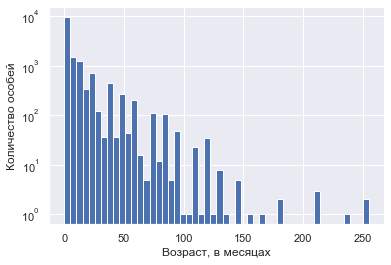

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
graf = plt.hist(df['Age'],bins=50)
graf = plt.xlabel('Возраст, в месяцах')
graf = plt.ylabel('Количество особей')
graf = plt.yscale('log')

# 4.  Перекодуйте змінну State через one-hot encoder. Після цього саму змінну видаліть.

In [56]:
dfDummies = pd.get_dummies(df['State'], prefix = 'State')
df.drop('State', axis=1, inplace=True)
dfDummies

,State_41324,State_41325,State_41326,State_41327,State_41330,State_41332,State_41335,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14989,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14990,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14991,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# 5. Створіть нову змінну - "чистокровність тварини". Тварина "чистокровна", коли вона походить від представників однієї породи. У змішаних порід поля Breed1 & Breed2 заповнені.

In [57]:
df['Чистокорвность'] = ((df['Breed1']!=0)&(df['Breed2']==0))|(df['Breed1']==df['Breed2'])
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Unique Name,Чистокорвность
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,True,True
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False,True
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,True,True
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,False,True
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,nan,2,266,0,3,1,0,0,2,...,4,0,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,False,True
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,2,0,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,True,False
14990,2,Monkies,2,265,266,3,5,6,7,3,...,5,30,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,True,False
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,0,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,True,True


# 6. Закодуйте через one-hot encoder популярні породи тварин (тільки ті, представників яких у масиві більше 150). Але перед цим візьміть з довідника порід і замініть числові коди на назви тварин (таблиця breed_labels.csv). Те саме для більшої зрозумілості даних зробіть із кольорами тварин (таблиця color_labels.csv).

In [58]:
pets = df.merge(breed_labels, left_on='Breed1', right_on='BreedID', how='left')

# find popular names
pets['BreedNameCount'] = pets.groupby('BreedName')['BreedName'].transform('count')
pets['BreedNamePopular'] = pets['BreedName']

# remove unpopular
pets.loc[pets['BreedNameCount'] <= 150, 'BreedNamePopular'] = None

# breed_names_onehot
breed_names_onehot = pd.get_dummies(pets['BreedNamePopular'])
breed_names_onehot


,Domestic Long Hair,Domestic Medium Hair,Domestic Short Hair,Golden Retriever,Labrador Retriever,Mixed Breed,Persian,Poodle,Shih Tzu,Siamese,Tabby,Terrier
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14988,0,0,1,0,0,0,0,0,0,0,0,0
14989,0,1,0,0,0,0,0,0,0,0,0,0
14990,0,1,0,0,0,0,0,0,0,0,0,0
14991,0,0,1,0,0,0,0,0,0,0,0,0


In [59]:
df = df.merge(color_labels, left_on='Color1', right_on='ColorID', how='left')
df['ColorCount'] = df.groupby('ColorName')['ColorName'].transform('count')

df.loc[df['ColorCount'] >= 150, 'Color1'] = df['ColorName']
df.loc[pets['BreedNameCount'] >= 150, 'Breed1'] = pets['BreedNamePopular']

df.drop(['ColorName','ColorCount', 'ColorID'], axis=1, inplace=True)
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Unique Name,Чистокорвность
0,2,Nibble,3,Tabby,0,1,Black,7,0,1,...,1,100,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,True,True
1,2,No Name Yet,1,Domestic Medium Hair,0,1,Black,2,0,2,...,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False,True
2,1,Brisco,1,Mixed Breed,0,1,Brown,7,0,2,...,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,True,True
3,1,Miko,4,Mixed Breed,0,2,Black,2,0,2,...,1,150,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,False,True
4,1,Hunter,1,Mixed Breed,0,1,Black,0,0,2,...,1,0,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,nan,2,Domestic Short Hair,0,3,Black,0,0,2,...,4,0,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,False,True
14989,2,Serato & Eddie,60,Domestic Medium Hair,264,3,Black,4,7,2,...,2,0,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,True,False
14990,2,Monkies,2,Domestic Medium Hair,266,3,Cream,6,7,3,...,5,30,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,True,False
14991,2,Ms Daym,9,Domestic Short Hair,0,2,Yellow,7,0,1,...,1,0,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,True,True


# 7. Перекодуйте змінну RescuerID так, щоб замість ID у якості коду була кількість тварин,яких узяв до себе цей "спаситель". 


In [60]:
df['RescuerID'] = pets.groupby('RescuerID')['RescuerID'].transform('count')
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Unique Name,Чистокорвность
0,2,Nibble,3,Tabby,0,1,Black,7,0,1,...,1,100,8,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,True,True
1,2,No Name Yet,1,Domestic Medium Hair,0,1,Black,2,0,2,...,1,0,1,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False,True
2,1,Brisco,1,Mixed Breed,0,1,Brown,7,0,2,...,1,0,459,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,True,True
3,1,Miko,4,Mixed Breed,0,2,Black,2,0,2,...,1,150,50,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,False,True
4,1,Hunter,1,Mixed Breed,0,1,Black,0,0,2,...,1,0,134,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,nan,2,Domestic Short Hair,0,3,Black,0,0,2,...,4,0,4,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,False,True
14989,2,Serato & Eddie,60,Domestic Medium Hair,264,3,Black,4,7,2,...,2,0,3,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,True,False
14990,2,Monkies,2,Domestic Medium Hair,266,3,Cream,6,7,3,...,5,30,19,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,True,False
14991,2,Ms Daym,9,Domestic Short Hair,0,2,Yellow,7,0,1,...,1,0,5,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,True,True


# 8. Створіть нову змінну - мова оголошення на основі змінної Description. Там оголошення на трьох мовах - англійській, китайські та майлайзійській.

In [61]:
from langdetect import detect
#долго думает*
df['Language']= df['Description'].replace([np.nan, '-', '.','0','1','2','..','---', ':)']
                                          , "вот такие пироги").apply(lambda x: detect(x))
df

# for i in lang_df['Description']:
#     try:
#         detect(i)
#     except:
#         print(i)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Unique Name,Чистокорвность,Language
0,2,Nibble,3,Tabby,0,1,Black,7,0,1,...,100,8,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,True,True,en
1,2,No Name Yet,1,Domestic Medium Hair,0,1,Black,2,0,2,...,0,1,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False,True,en
2,1,Brisco,1,Mixed Breed,0,1,Brown,7,0,2,...,0,459,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,True,True,en
3,1,Miko,4,Mixed Breed,0,2,Black,2,0,2,...,150,50,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,False,True,en
4,1,Hunter,1,Mixed Breed,0,1,Black,0,0,2,...,0,134,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,False,True,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,nan,2,Domestic Short Hair,0,3,Black,0,0,2,...,0,4,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,False,True,en
14989,2,Serato & Eddie,60,Domestic Medium Hair,264,3,Black,4,7,2,...,0,3,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,True,False,en
14990,2,Monkies,2,Domestic Medium Hair,266,3,Cream,6,7,3,...,30,19,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,True,False,en
14991,2,Ms Daym,9,Domestic Short Hair,0,2,Yellow,7,0,1,...,0,5,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,True,True,en


# 9. Створіть змінну-індекс оцінки здоров'я тварини на основі змінних **Vaccinated, Dewormed, Sterilized**. Для цього перекодуйте значення 2 в 0, значення 3 - в пропущене і додайте ці три змінні одне до одної.

In [62]:
df["Vaccinated"], df["Dewormed"], df["Sterilized"] = [df.replace(to_replace =[2,3], value =[0,None]),
                                                      df.replace(to_replace =[2,3], value =[0,None]),
                                                      df.replace(to_replace =[2,3], value =[0,None])] 
df['Здоров\'я'] = df["Vaccinated"]+df["Dewormed"]+df["Sterilized"]
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Unique Name,Чистокорвность,Language,Здоров'я
0,2,Nibble,3,Tabby,0,1,Black,7,0,1,...,8,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,True,True,en,0
1,2,No Name Yet,1,Domestic Medium Hair,0,1,Black,2,0,2,...,1,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False,True,en,0
2,1,Brisco,1,Mixed Breed,0,1,Brown,7,0,2,...,459,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,True,True,en,3
3,1,Miko,4,Mixed Breed,0,2,Black,2,0,2,...,50,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,False,True,en,3
4,1,Hunter,1,Mixed Breed,0,1,Black,0,0,2,...,134,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,False,True,en,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,nan,2,Domestic Short Hair,0,3,Black,0,0,2,...,4,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,False,True,en,0
14989,2,Serato & Eddie,60,Domestic Medium Hair,264,3,Black,4,7,2,...,3,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,True,False,en,0
14990,2,Monkies,2,Domestic Medium Hair,266,3,Cream,6,7,3,...,19,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,True,False,en,0
14991,2,Ms Daym,9,Domestic Short Hair,0,2,Yellow,7,0,1,...,5,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,True,True,en,0


# 10. Створіть нову змінну на основі змінної **Name**. Нова змінна має відображати кількість тварин, що віддаються. Якщо записано тільки одну кличку - це одна тварина, дві і більше - група тварин.

In [63]:
df['Группа'] = df['Name'].str.contains('&|,|Puppies|Kittens|And|and')
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Unique Name,Чистокорвность,Language,Здоров'я,Группа
0,2,Nibble,3,Tabby,0,1,Black,7,0,1,...,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,True,True,en,0,False
1,2,No Name Yet,1,Domestic Medium Hair,0,1,Black,2,0,2,...,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False,True,en,0,False
2,1,Brisco,1,Mixed Breed,0,1,Brown,7,0,2,...,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,True,True,en,3,False
3,1,Miko,4,Mixed Breed,0,2,Black,2,0,2,...,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,False,True,en,3,False
4,1,Hunter,1,Mixed Breed,0,1,Black,0,0,2,...,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,False,True,en,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,nan,2,Domestic Short Hair,0,3,Black,0,0,2,...,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,False,True,en,0,False
14989,2,Serato & Eddie,60,Domestic Medium Hair,264,3,Black,4,7,2,...,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,True,False,en,0,True
14990,2,Monkies,2,Domestic Medium Hair,266,3,Cream,6,7,3,...,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,True,False,en,0,False
14991,2,Ms Daym,9,Domestic Short Hair,0,2,Yellow,7,0,1,...,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,True,True,en,0,False


# 11. Виведіть матрицю кореляцій змінних масиву, попередньо замінивши пусті значення в масиві на медіану. Яка пара кореляює найбільше?

In [65]:
mean_artist_hotness = df.mean(skipna=True)
df=df.fillna(mean_artist_hotness) 

kor = df.corr()
kor[np.abs(kor) < 0.5] = np.nan
kor

,Type,Age,Breed2,Gender,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,...,Quantity,Fee,RescuerID,VideoAmt,PhotoAmt,AdoptionSpeed,Unique Name,Чистокорвность,Здоров'я,Группа
Type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breed2,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.667233,NaN,NaN
Gender,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaturitySize,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FurLength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vaccinated,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Dewormed,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [66]:
df.drop(['Vaccinated','Dewormed', 'Sterilized'], axis=1, inplace=True)

In [69]:
def corrank(X):
    import itertools
    new_df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],
                          columns=['pairs','corr'])    
    print(new_df.sort_values(by='corr',ascending=False))
corrank(df)

                        pairs      corr
56         (Gender, Quantity)  0.494489
65           (Gender, Группа)  0.332993
134        (Quantity, Группа)  0.331884
83         (Color3, Quantity)  0.272548
148     (RescuerID, Здоров'я)  0.270602
..                        ...       ...
91         (Color3, Здоров'я) -0.201693
78         (Color2, Здоров'я) -0.246333
10          (Type, RescuerID) -0.270602
48   (Breed2, Чистокорвность) -0.667233
16           (Type, Здоров'я) -1.000000

[171 rows x 2 columns]


# 12. Приведіть масив у готовність до моделювання: видаліть категоріальні  змінні, які лишилися, змінні кольору перетворіть також у бінарні. Перевторений масив розділіть на 4 матриці: train, test, y_train, y_test, при цьому їх пропорція має складати 80/20. 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 28 columns):
Type              14993 non-null int64
Name              14993 non-null object
Age               14993 non-null int64
Breed1            14993 non-null object
Breed2            14993 non-null int64
Gender            14993 non-null int64
Color1            14993 non-null object
Color2            14993 non-null int64
Color3            14993 non-null int64
MaturitySize      14993 non-null int64
FurLength         14993 non-null int64
Vaccinated        14993 non-null object
Dewormed          14993 non-null object
Sterilized        14993 non-null object
Health            14993 non-null int64
Quantity          14993 non-null int64
Fee               14993 non-null int64
RescuerID         14993 non-null int64
VideoAmt          14993 non-null int64
Description       14981 non-null object
PetID             14993 non-null object
PhotoAmt          14993 non-null float64
AdoptionSpeed     14993

In [76]:
y = df['Gender'].values
X = df.loc[:,['Type', 'Age', 'Gender', 'MaturitySize', 'FurLength','Health',
              'AdoptionSpeed', 'Fee', 'VideoAmt', 'PhotoAmt', 'Quantity']].values


In [77]:
X

array([[2., 3., 1., ..., 0., 1., 1.],
       [2., 1., 1., ..., 0., 2., 1.],
       [1., 1., 1., ..., 0., 7., 1.],
       ...,
       [2., 2., 3., ..., 0., 5., 5.],
       [2., 9., 2., ..., 0., 3., 1.],
       [1., 1., 1., ..., 0., 1., 1.]])

In [78]:
y

array([1, 1, 1, ..., 3, 2, 1], dtype=int64)

In [79]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state=42)
K_nei = KNeighborsRegressor(n_neighbors = 5, metric='hamming', n_jobs=-2) 
K_nei.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=-2, n_neighbors=5, p=2,
                    weights='uniform')